In [66]:
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [67]:
mnist = tf.keras.datasets.mnist
(train, train_label), (test, test_label) = mnist.load_data()

print(train.shape)
print(test.shape)
print(train[0])

train = train/255.0
test = test/255.0

(60000, 28, 28)
(10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  1

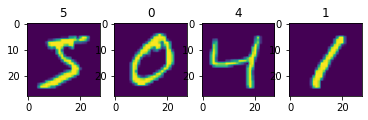

In [68]:
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(train[i])
    plt.title(train_label[i])

In [69]:
inp = tf.keras.layers.Input(shape=(train.shape[1], train.shape[2]))
lstm = tf.keras.layers.LSTM(50,activation='relu')(inp)
output = tf.keras.layers.Dense(10,activation='softmax')(lstm)


rnn_model = tf.keras.models.Model(inp, output)
rnn_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                15800     
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 16,310
Trainable params: 16,310
Non-trainable params: 0
_________________________________________________________________


In [70]:
rnn_model.compile( optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"], loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True))
rnn_hist = rnn_model.fit(train, train_label, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 22s 11ms/step - loss: 1.3732 - accuracy: 0.5384
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4976 - accuracy: 0.8429
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3418 - accuracy: 0.8936
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2736 - accuracy: 0.9145
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2340 - accuracy: 0.9268
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2064 - accuracy: 0.9354
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1870 - accuracy: 0.9410
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1712 - accuracy: 0.9464
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1583 - accuracy: 0.9505
Epoch 10/10
1875/1875 [==============================] - 21s 11ms/step - lo

In [71]:
predict = rnn_model.predict(test)

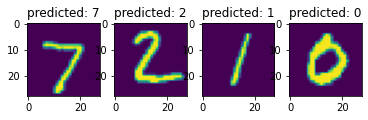

In [76]:
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(test[i])
    plt.title("predicted: {}".format(np.argmax(np.round(predict[i]))))